# Visualization Demostration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In this lecture, we will demonstrate visualization techniques on the World Bank dataset. This dataset includes information about countries and development statistics from around the world.

In [2]:
wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


In [3]:
wb.shape

(166, 47)

## Bar Plots

We often use bar plots to display **distributions** of a **categorical variable**. 

In the examples below, we plot the distribution of the `"Continent"` column. The cell below uses `.value_counts()` to determine the number of countries corresponding to each continent in the dataset.

In [4]:
wb["Continent"].value_counts()

Africa        47
Europe        43
Asia          34
N. America    18
Oceania       13
S. America    11
Name: Continent, dtype: int64

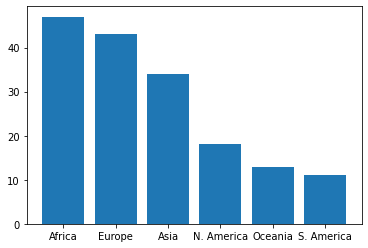

In [5]:
continents = wb["Continent"].value_counts()
plt.bar(continents.index, continents.values);

Note that we concluded our call to `plt.bar` with a semicolon (`;`). This suppresses any unnecessary output other than the plot. If we do not include a semicolon, the plot will still generate, however, we will see extraneous text as well:

<BarContainer object of 6 artists>

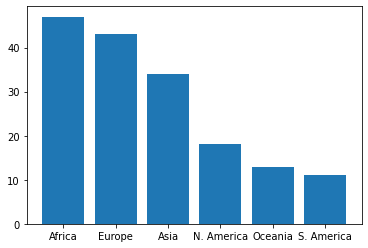

In [6]:
plt.bar(continents.index, continents)

We also remember to set the axis labels and the title for the plot.

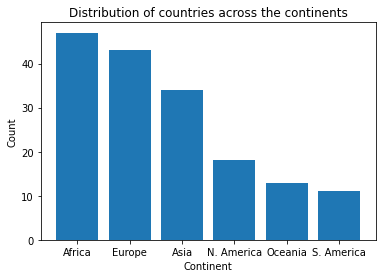

In [7]:
plt.bar(continents.index, continents)

plt.xlabel("Continent")
plt.ylabel("Count")
plt.title("Distribution of countries across the continents");

`pandas` native plotting:

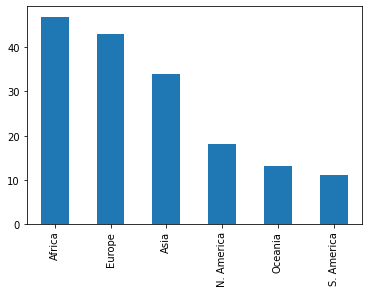

In [8]:
wb["Continent"].value_counts().plot(kind='bar');

Equivalently, we could use the `countplot` method of the Seaborn library to create our bar plot.

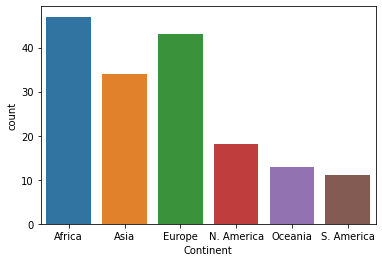

In [9]:
sns.countplot(data=wb, x='Continent');

Above, we said that bar plots should only be used to visualize the distribution of a qualitative (categorical) variable. Why is that? Consider what happens when we try to use `sns.countplot` to visualize a quantitative variable, gross national income per capita.

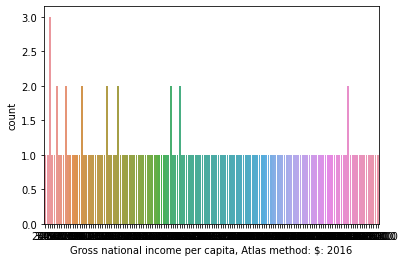

In [10]:
sns.countplot(data=wb, x='Gross national income per capita, Atlas method: $: 2016');

What happened? A bar plot (either `plt.bar` or `sns.countplot`) will create a separate bar for *each* unique value of a variable. With a continuous variable, we may not have a finite number of possible values, which can lead to situations where we would need many, many bars to display each unique value. 

To visualize the distribution of a continuous variable, we use a different type of plot:
* Histogram
* Box plot
* Violin plot

## Box Plots and Violin Plots

Box plots and violin plots are two very similar kinds of visualizations. Both display the distribution of a variable using information about quartiles.

In a box plot, the width of the box at any point does not encode meaning. In a violin plot, the width of the plot indicates the *density* of the distribution at each possible value.

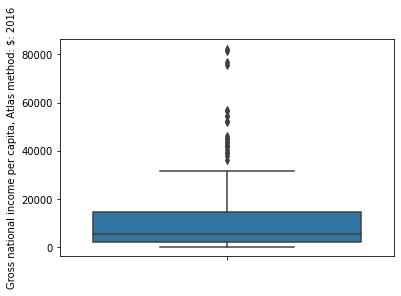

In [11]:
sns.boxplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016");

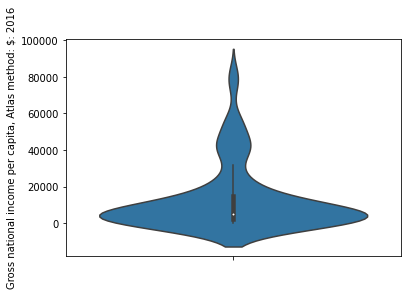

In [12]:
sns.violinplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016");

A quartile represents a 25% portion of the data. We say that:
* The first quartile (Q1) repesents the 25th percentile – 25% of the data lies below the first quartile
* The second quartile (Q2) represents the 50th percentile, also known as the median – 50% of the data lies below the second quartile
* The third quartile (Q3) represents the 75th percentile – 75% of the data lies below the third quartile.

This means that the middle 50% of the data lies *between* the first and third quartiles. This is demonstrated in the histogram below. The three quartiles are marked with red vertical bars.

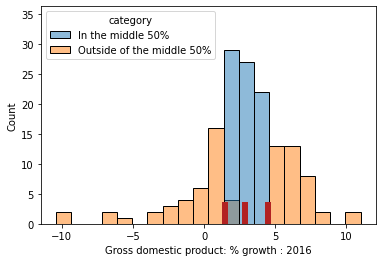

In [13]:
gdp = wb['Gross domestic product: % growth : 2016']
gdp = gdp[~gdp.isna()]

q1, q2, q3 = np.percentile(gdp, [25, 50, 75])

wb_quartiles = wb.copy()
wb_quartiles['category'] = None
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] < q1) | (wb_quartiles['Gross domestic product: % growth : 2016'] > q3), 'category'] = 'Outside of the middle 50%'
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] > q1) & (wb_quartiles['Gross domestic product: % growth : 2016'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(wb_quartiles, x="Gross domestic product: % growth : 2016", hue="category")
sns.rugplot([q1, q2, q3], c="firebrick", lw=6, height=0.1);

In a box plot, the lower extent of the box lies at Q1, while the upper extent of the box lies at Q3. The horizontal line in the middle of the box corresponds to Q2 (equivalently, the median).

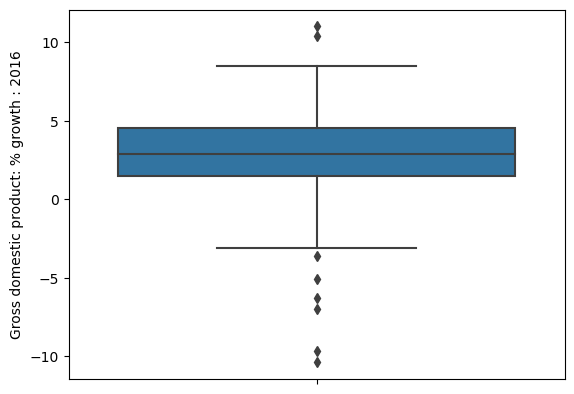

In [ ]:
sns.boxplot(data=wb, y='Gross domestic product: % growth : 2016');

A violin plot display quartile information, albeit a bit more subtly. Look closely at the center vertical bar of the violin plot below!

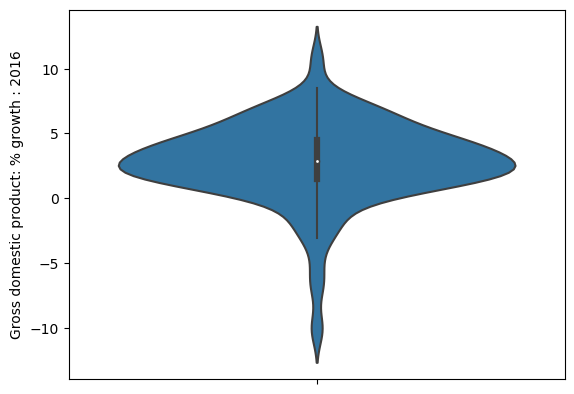

In [ ]:
sns.violinplot(data=wb, y='Gross domestic product: % growth : 2016');

Plotting side-by-side box or violin plots allow us to compare distributions across different categories. In other words, they enable us to plot *both* a qualitative variable and a quantitative continuous variable in one visualization.

Seaborn allows us to easily create side-by-side plots by specify both an `x` and `y` column.

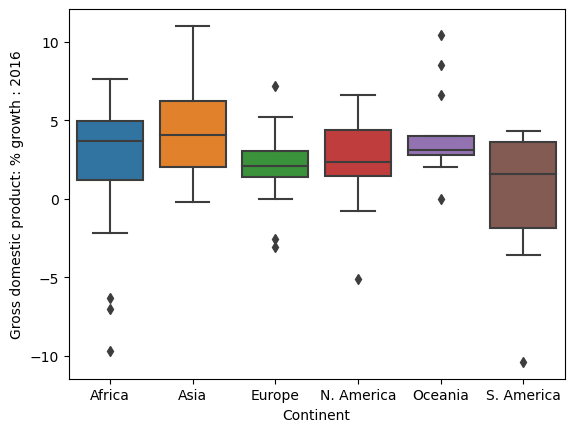

In [ ]:
sns.boxplot(data=wb, x="Continent", y='Gross domestic product: % growth : 2016');

## Histograms

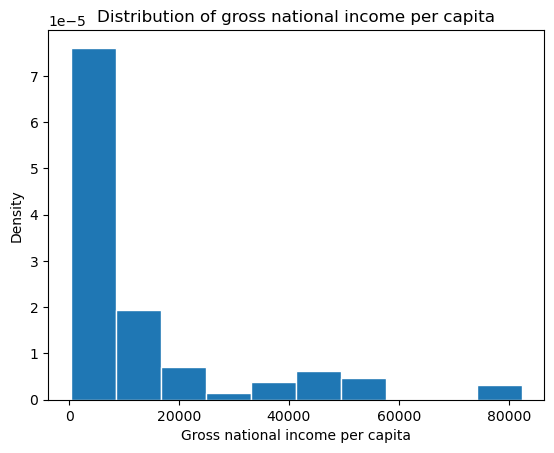

In [ ]:
# The `edgecolor` argument controls the color of the bin edges
gni = wb["Gross national income per capita, Atlas method: $: 2016"]
plt.hist(gni, density=True, edgecolor="white")

# Add labels
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("Distribution of gross national income per capita");

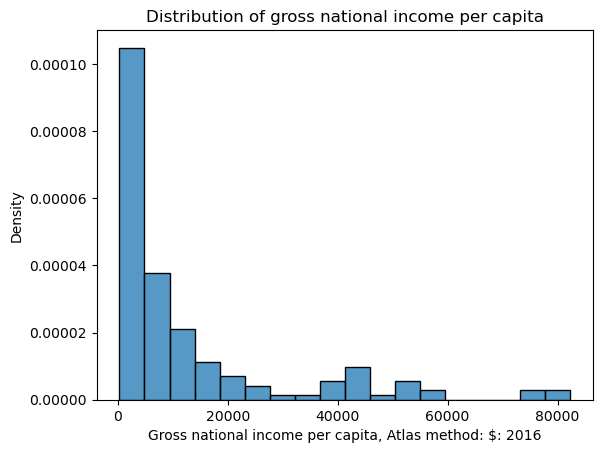

In [ ]:
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", stat="density")
plt.title("Distribution of gross national income per capita");

We can overlay histograms (or density curves) to compare distributions across qualitative categories.

The `hue` parameter of `sns.histplot` specifies the column that should be used to determine the color of each category. `hue` can be used in many Seaborn plotting functions.

Notice that the resulting plot includes a legend describing which color corresponds to each hemisphere – a legend should always be included if color is used to encode information in a visualization!

In [ ]:
# Create a new variable to store the hemisphere in which each country is located
north = ["Asia", "Europe", "N. America"]
south = ["Africa", "Oceania", "S. America"]
wb.loc[wb["Continent"].isin(north), "Hemisphere"] = "Northern"
wb.loc[wb["Continent"].isin(south), "Hemisphere"] = "Southern"

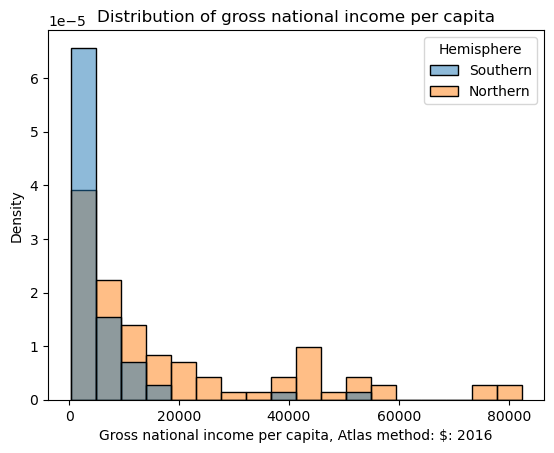

In [ ]:
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", hue="Hemisphere", stat="density")
plt.title("Distribution of gross national income per capita");

Each bin of a histogram is scaled such that its area is equal to the percentage of all datapoints that it contains.

First bin has width 16410.0 and height 4.7741589911386953e-05
This corresponds to 16410.0 * 4.7741589911386953e-05 = 78.343949044586% of the data


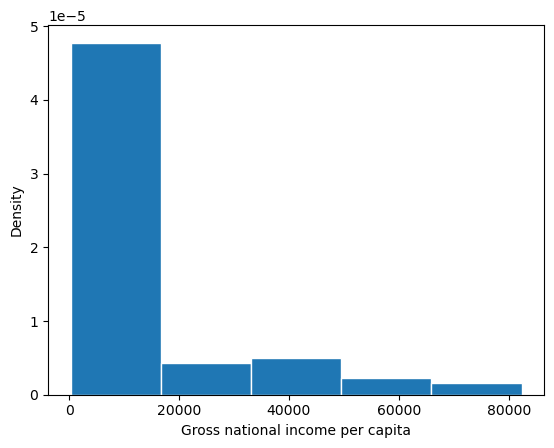

In [ ]:
densities, bins, _ = plt.hist(gni, density=True, edgecolor="white", bins=5)
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")

print(f"First bin has width {bins[1]-bins[0]} and height {densities[0]}")
print(f"This corresponds to {bins[1]-bins[0]} * {densities[0]} = {(bins[1]-bins[0])*densities[0]*100}% of the data")

We describe a "mode" of a histogram as a peak in the distribution. Often, however, it is difficult to determine what counts as its own "peak." For example, the number of peaks in the distribution of HIV rates across different countries varies depending on the number of histogram bins we plot. 

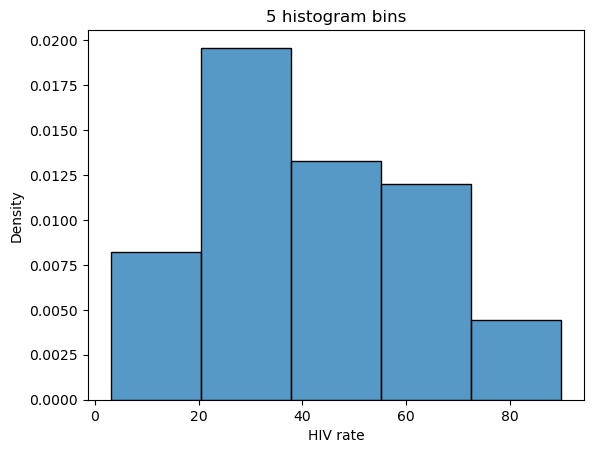

In [ ]:
# Rename the very long column name for convenience
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate"})

# With 5 bins, it seems that there is only one peak
sns.histplot(data=wb, x="HIV rate", stat="density", bins=5)
plt.title("5 histogram bins");

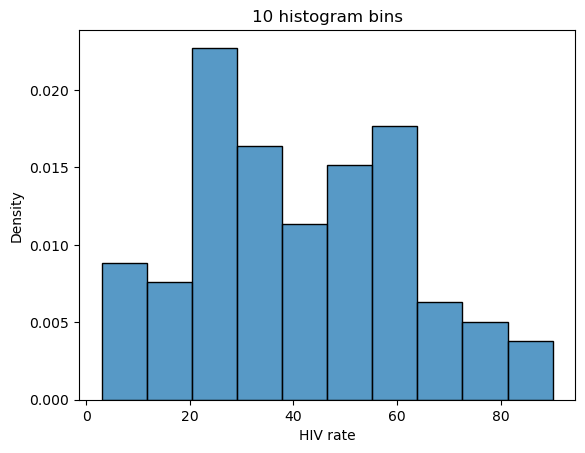

In [ ]:
# With 10 bins, there seem to be two peaks

sns.histplot(data=wb, x="HIV rate", stat="density", bins=10)
plt.title("10 histogram bins");

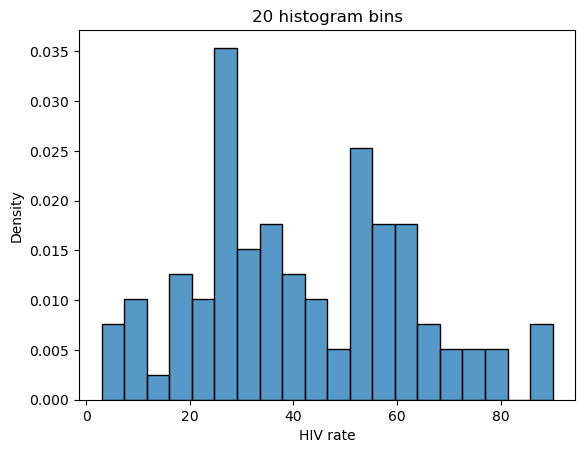

In [ ]:
# And with 20 bins, it becomes hard to say what counts as a "peak"!

sns.histplot(data=wb, x ="HIV rate", stat="density", bins=20)
plt.title("20 histogram bins");

As this example illustrates, it is sometimes more useful to understand the general structure of our data, rather than focus on individual observations. Kernel density estimation helps with this goal.

## Scatter Plots

Scatter plots are used to visualize the **relationship** between two **quantitative continuous variables**.

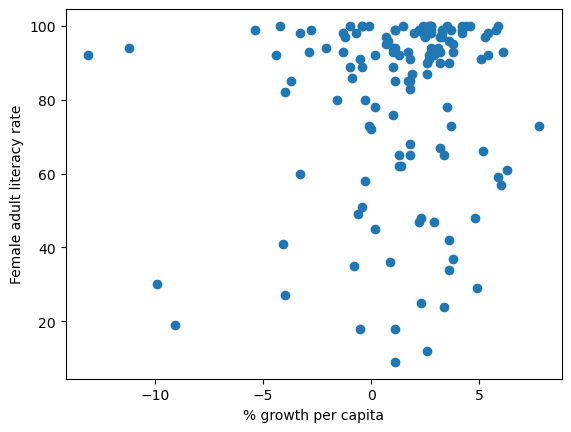

In [ ]:
plt.scatter(wb['per capita: % growth: 2016'], wb['Adult literacy rate: Female: % ages 15 and older: 2005-14'])
plt.xlabel("% growth per capita")
plt.ylabel("Female adult literacy rate");

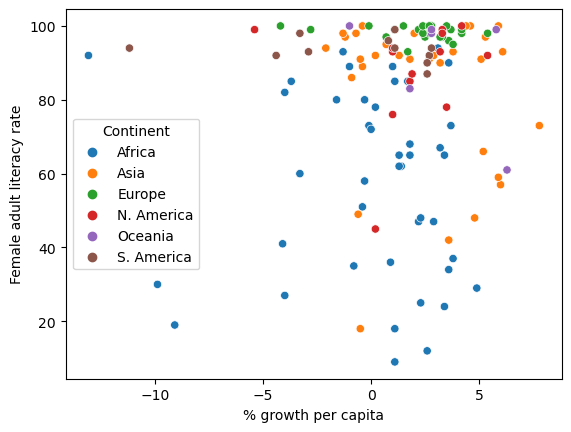

In [ ]:
sns.scatterplot(data=wb, x='per capita: % growth: 2016', \
                y='Adult literacy rate: Female: % ages 15 and older: 2005-14', hue="Continent")
plt.xlabel("% growth per capita")
plt.ylabel("Female adult literacy rate");

The plots above suffer from **overplotting** – many scatter points are stacked on top of one another (particularly in the upper right region of the plot). 

**Jittering** is a processed used to address overplotting. A small amount of random noise is added to the x and y values of all datapoints. 

Decreasing the size of each scatter point using the `s` parameter of `plt.scatter` also helps.

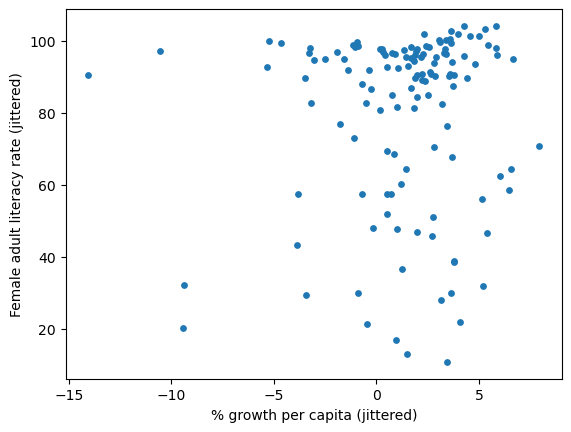

In [ ]:
random_x_noise = np.random.uniform(-1, 1, len(wb))
random_y_noise = np.random.uniform(-5, 5, len(wb))

plt.scatter(wb['per capita: % growth: 2016']+random_x_noise, \
            wb['Adult literacy rate: Female: % ages 15 and older: 2005-14']+random_y_noise, s=15)

plt.xlabel("% growth per capita (jittered)")
plt.ylabel("Female adult literacy rate (jittered)");

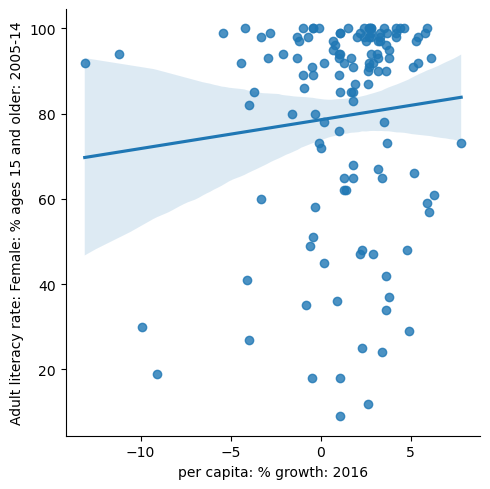

In [ ]:
sns.lmplot(data=wb, x='per capita: % growth: 2016', \
           y='Adult literacy rate: Female: % ages 15 and older: 2005-14');

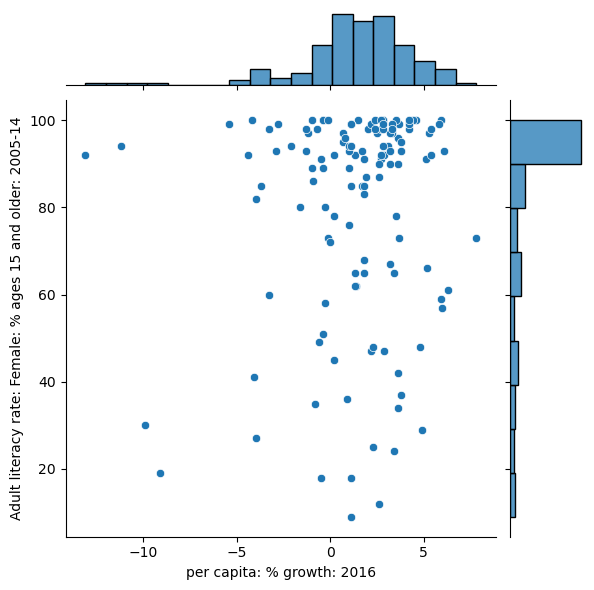

In [ ]:
sns.jointplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14');

## Hex Plots

Rather than plot individual datapoints, plot the *density* of how datapoints are distributed in 2D. A darker hexagon means that more datapoints lie in that region.

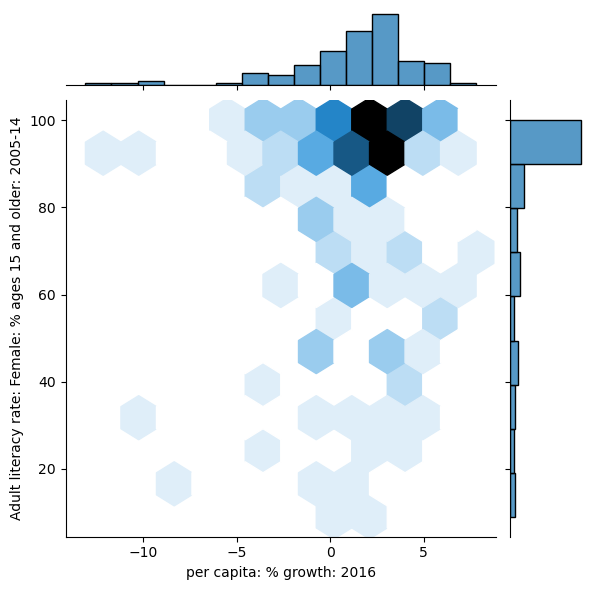

In [ ]:
sns.jointplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14',
              kind='hex');

## Contour Plots

Contour plots are similar to topographic maps. Contour lines of the same color have the same *density* of datapoints. The region with the darkest color contains the most datapoints of all regions.We can think of a contour plot as the 2D equivalent of a KDE curve.

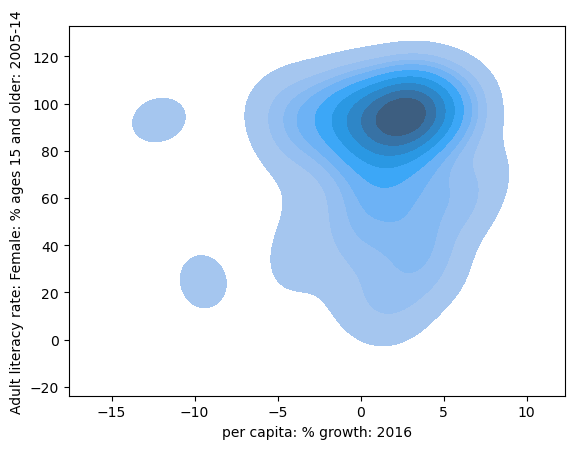

In [ ]:
sns.kdeplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14', fill=True);

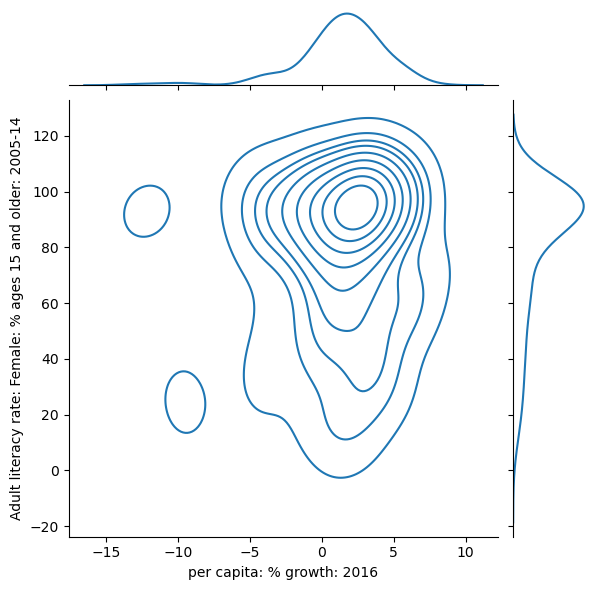

In [ ]:
sns.jointplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14',
              kind='kde');